In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
from sklearn.utils import shuffle
import time
from sklearn.model_selection import train_test_split
%config InlineBackend. figure_format = 'retina'

# Install TensorFlow
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten , Convolution2D, MaxPooling2D , Lambda, Conv2D, Activation,Concatenate, Input
from tensorflow.keras.optimizers import Adam , SGD , Adagrad
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, CSVLogger, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers , initializers
from sklearn.metrics import confusion_matrix
import tensorflow.keras.backend as K
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import h5py
import matplotlib.pyplot as plt

In [3]:
### show the features of data
### since the there are 9 files, and I only use the first one

data_tmp1 = h5py.File('/kaggle/input/phys591000-top-jets/fixed/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_6.z', 'r')

data6 = h5py.File('/kaggle/input/phys591000-top-jets/fixed/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_6.z', 'r')['t_allpar_new']
data0 = h5py.File('/kaggle/input/phys591000-top-jets/fixed/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_0.z', 'r')['t_allpar_new']
data4 = h5py.File('/kaggle/input/phys591000-top-jets/fixed/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_4.z', 'r')['t_allpar_new']
data5 = h5py.File('/kaggle/input/phys591000-top-jets/fixed/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_5.z', 'r')['t_allpar_new']
data1 = h5py.File('/kaggle/input/phys591000-top-jets/fixed/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_1.z', 'r')['t_allpar_new']
data9 = h5py.File('/kaggle/input/phys591000-top-jets/fixed/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_9.z', 'r')['t_allpar_new']
data7 = h5py.File('/kaggle/input/phys591000-top-jets/fixed/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_7.z', 'r')['t_allpar_new']
data8 = h5py.File('/kaggle/input/phys591000-top-jets/fixed/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_8.z', 'r')['t_allpar_new']
data2 = h5py.File('/kaggle/input/phys591000-top-jets/fixed/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_2.z', 'r')['t_allpar_new']
data3 = h5py.File('/kaggle/input/phys591000-top-jets/fixed/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_3.z', 'r')['t_allpar_new']
data = [data0, data1, data2, data3, data4, data5, data6, data7, data8, data9]


# all = []
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         data_tmp_ = h5py.File(os.path.join(dirname, filename),'r')['t_allpar_new']
#         tmp = pd.DataFrame(np.array(data_tmp_))
#         all.append(tmp)
# #         number.append(len(np.unique(data_tmp_['j_index'])))
#         pass
#     pass

# sum(number)

label = ['j_g', 'j_q', 'j_w', 'j_z', 'j_t']
int_features = ['j_mass', 'j_multiplicity', 'j_zlogz','j_c1_b0', 'j_c1_b1', 'j_c1_b2', 'j_c2_b1', 'j_c2_b2', 'j_d2_b1', 'j_d2_b2', 'j_d2_a1_b1', 'j_d2_a1_b2', 'j_m2_b1', 'j_m2_b2', 'j_n2_b1', 'j_n2_b2']
tq_features = ['j_mass','j_multiplicity', 'j_zlogz', 'j_c1_b1', 'j_c1_b2', 'j_c2_b1', 'j_d2_a1_b2', 'j_m2_b2',  'j_n2_b1', 'j_n2_b2']

# len(np.unique(data6['j_index']))

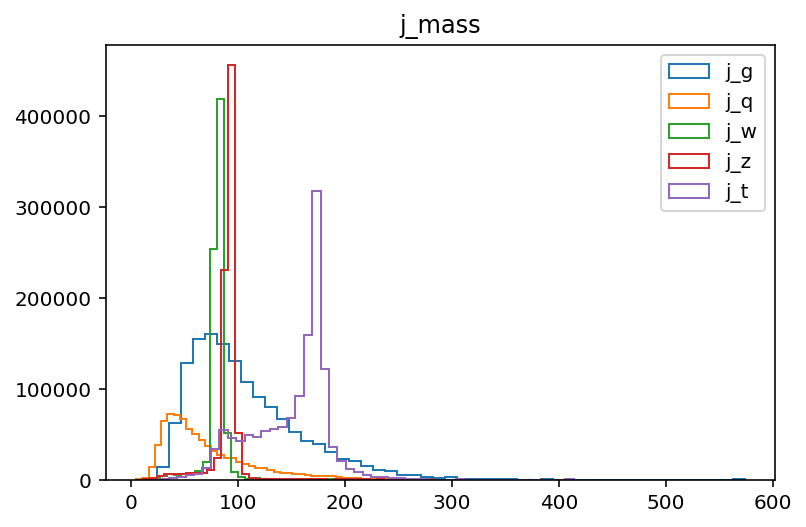

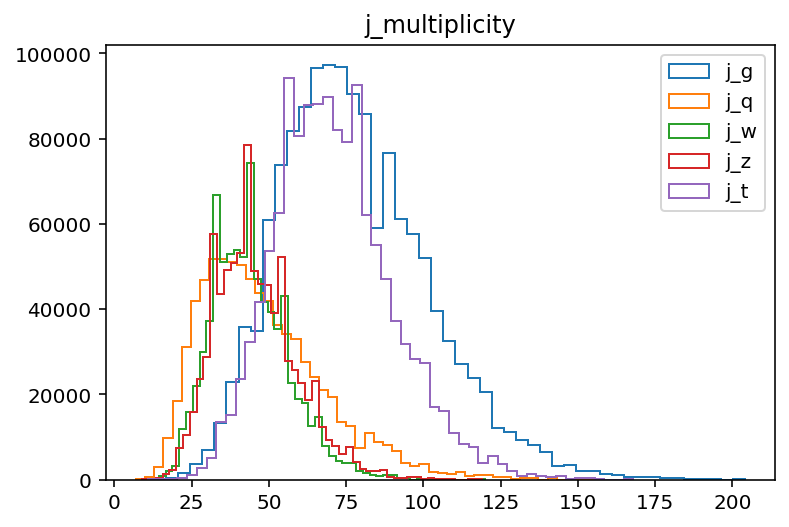

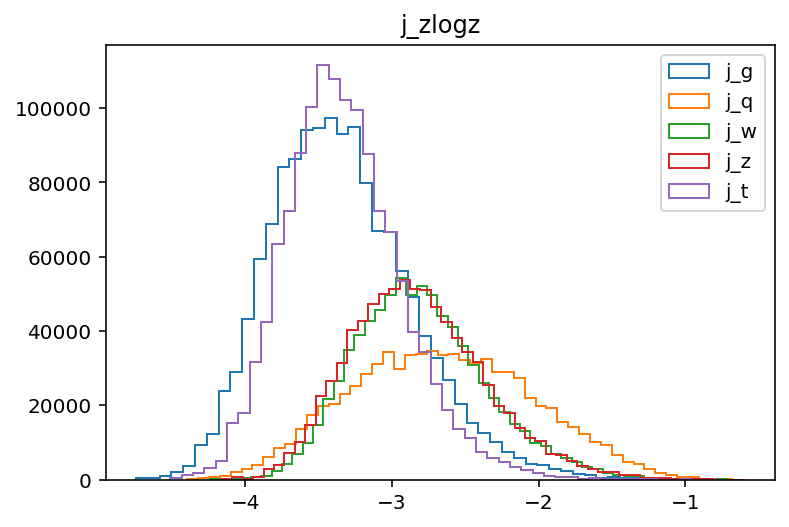

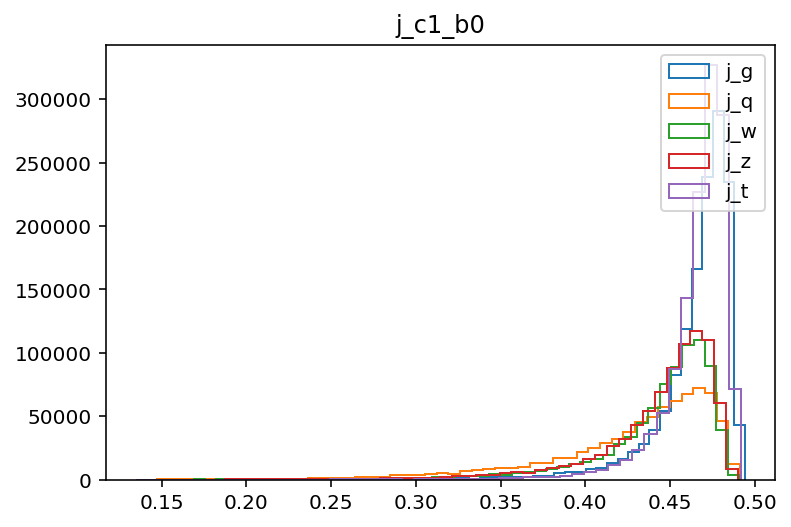

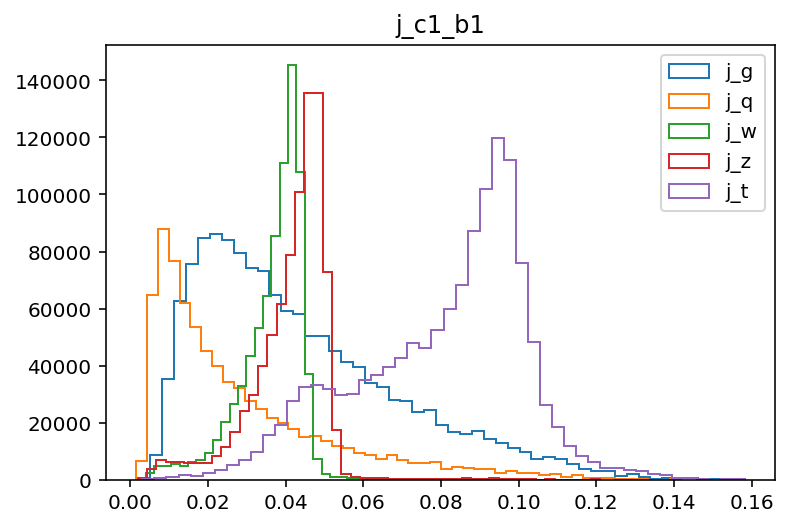

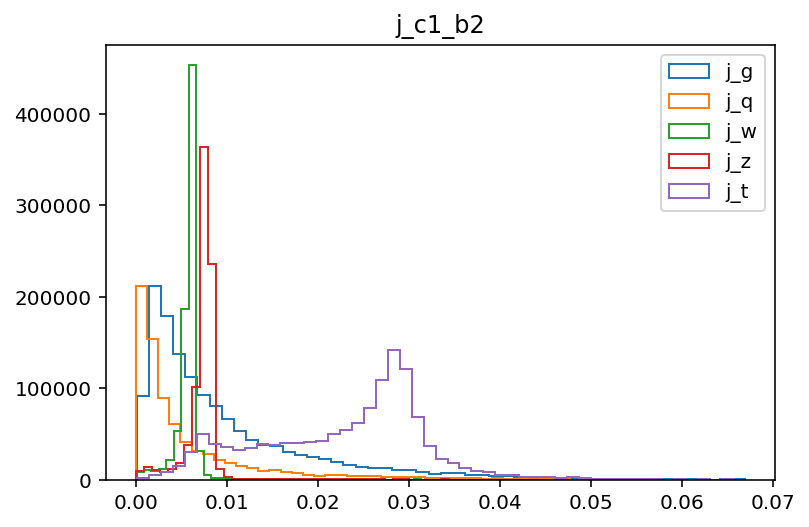

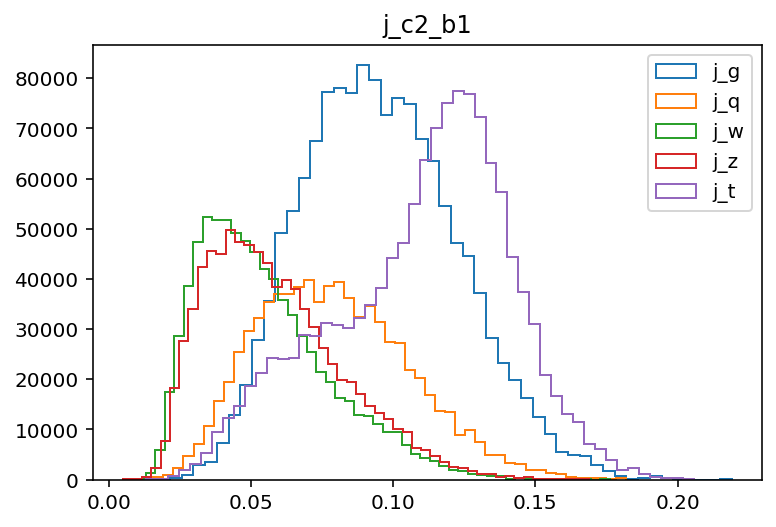

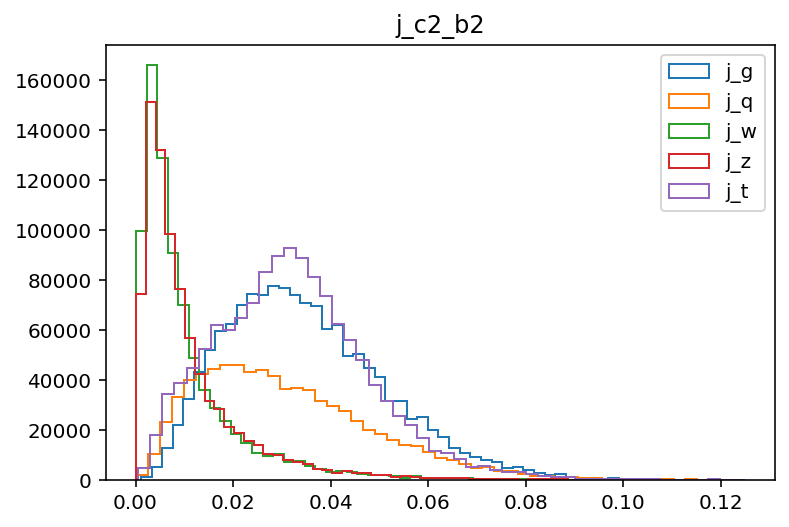

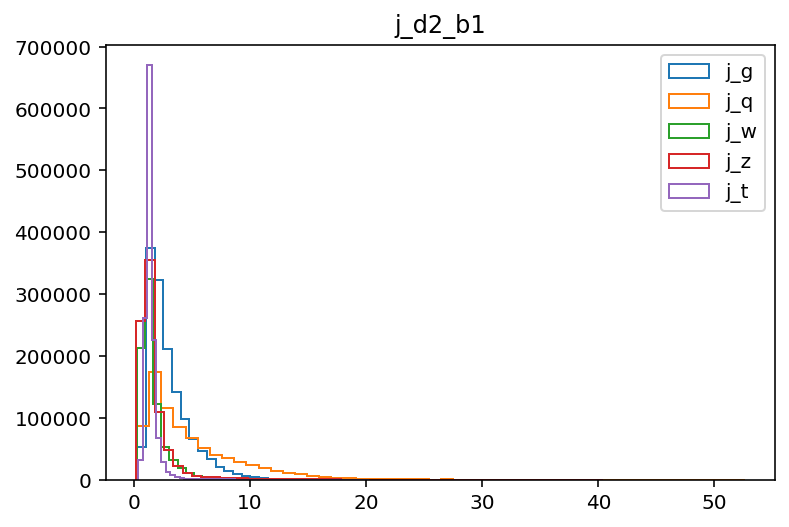

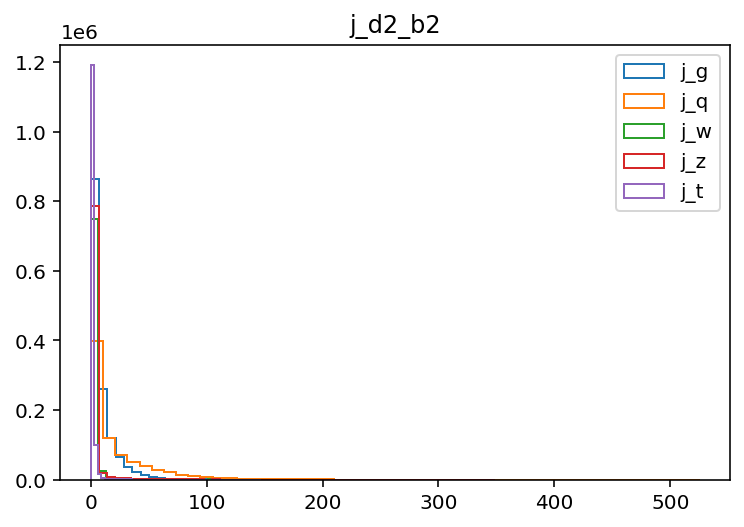

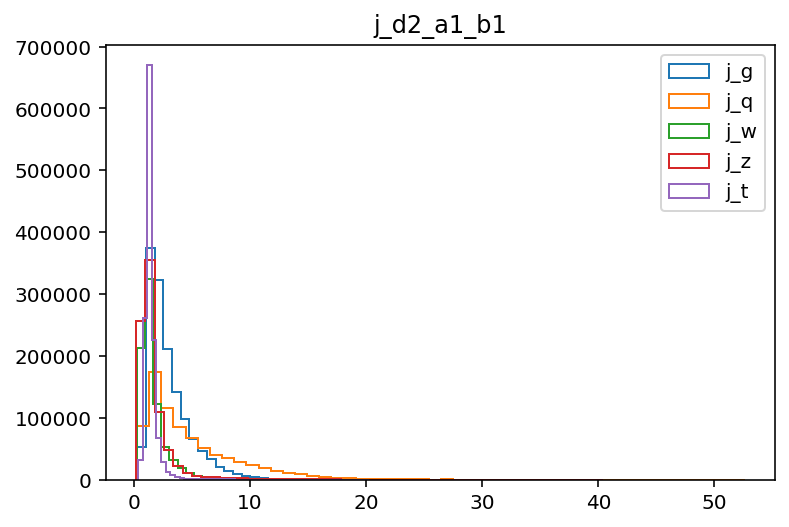

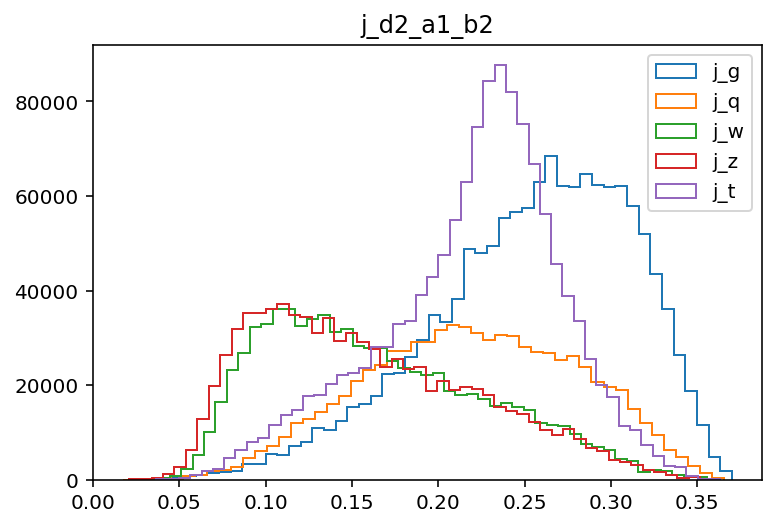

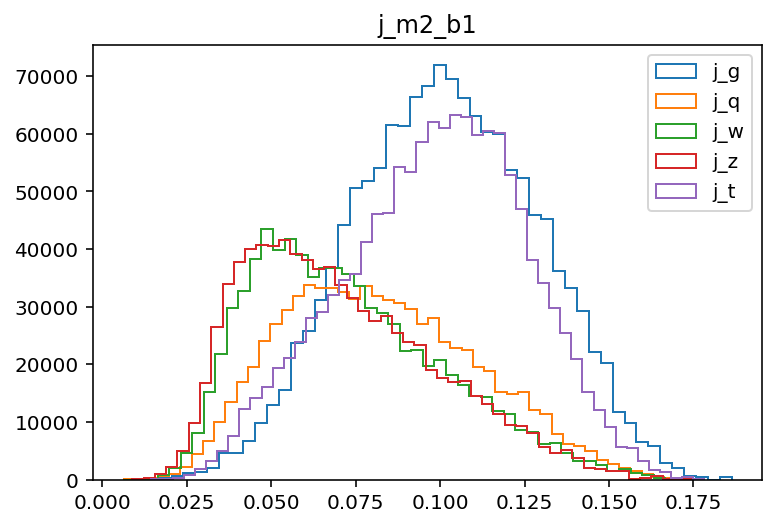

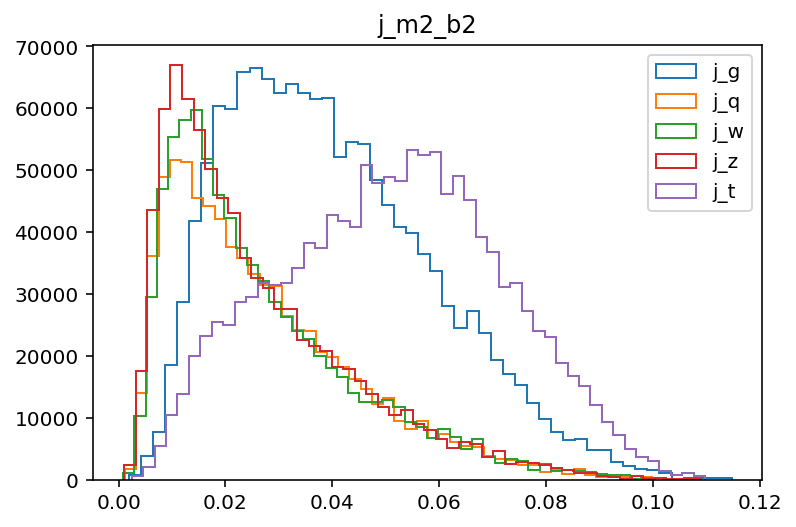

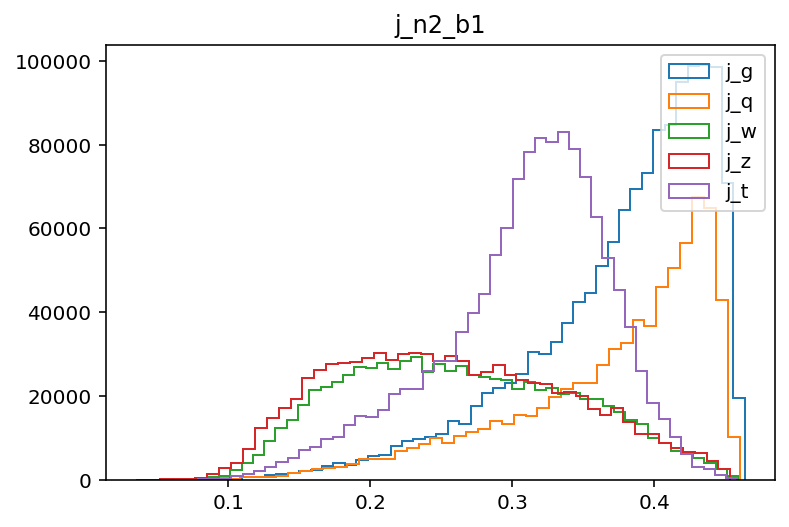

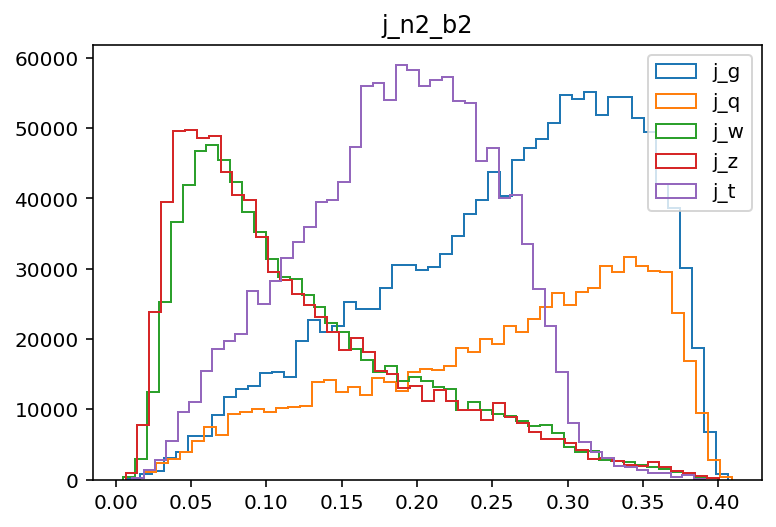

In [4]:
### visuallization

for feature in int_features:
    for i in range(5):
        tmp = data6[data6[label[i]]==1]
        plt.hist(tmp[feature], bins=50, histtype='step', label=label[i])
    plt.title(feature)
    plt.legend(loc='best')
    plt.show()

note that the multiplicity has only integer, so the histograms look a little strange.

### Discussion

As the visuallization shown, these 4 features are highlt saperated. So, these 4 features are good to use to make the training features. Of course, we can use decision tree or correlation table to see what features are more highly saperated.

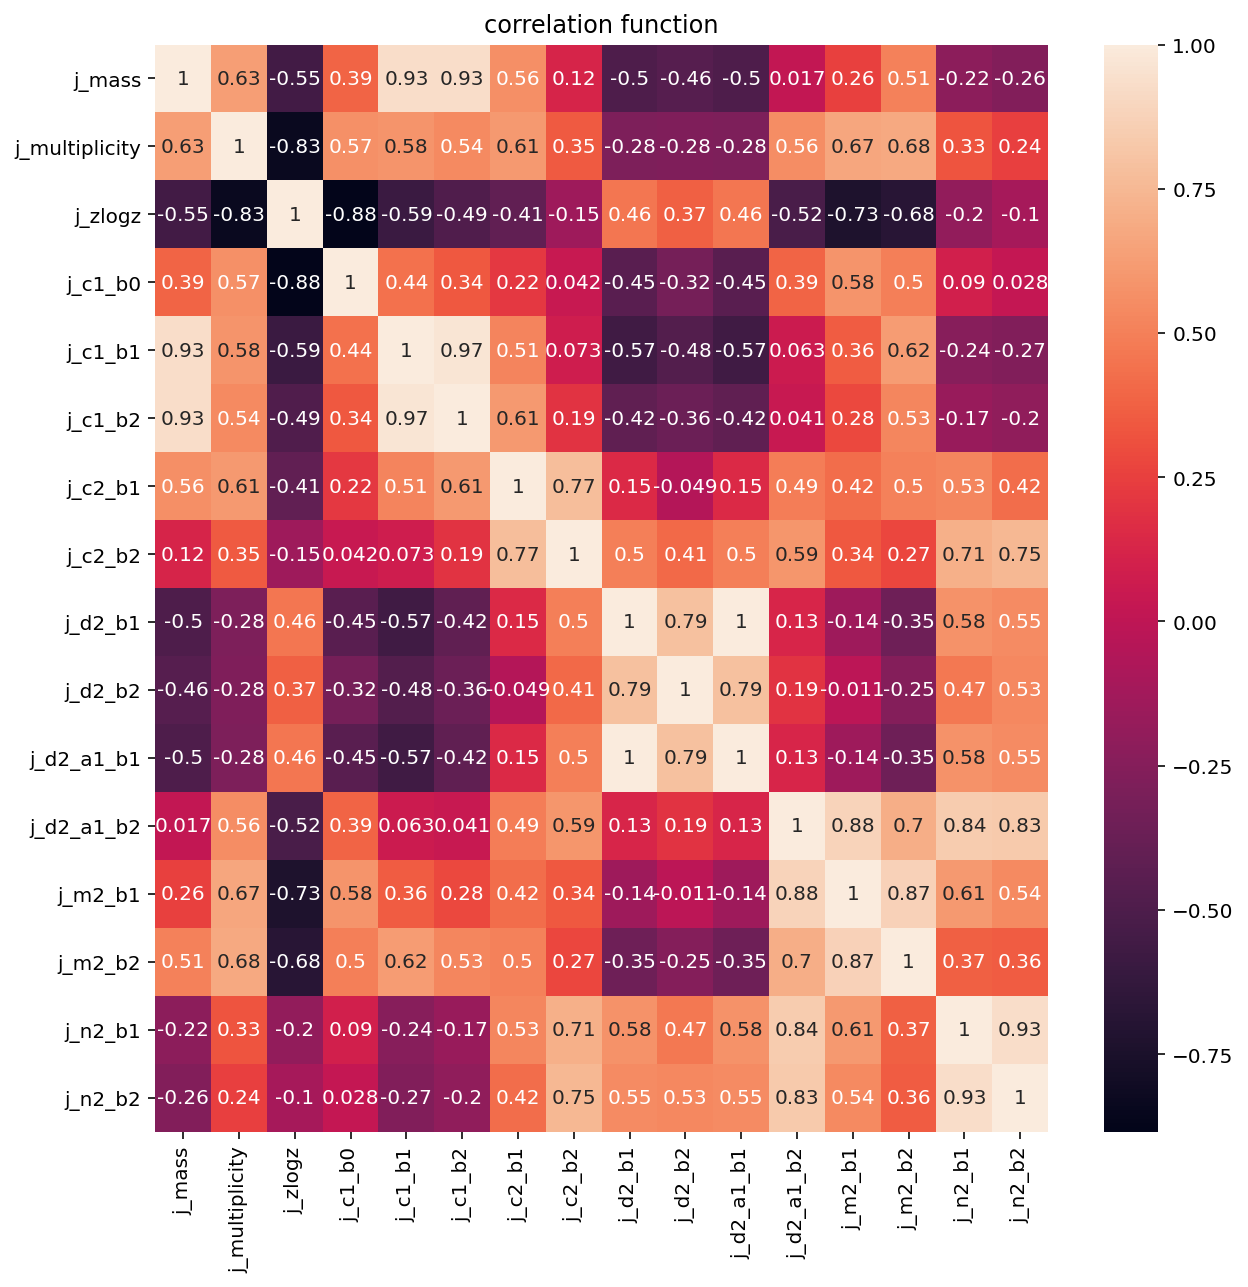

In [5]:
import seaborn as sns

DNN_data_df = pd.DataFrame(np.array(data0))

selectdata = DNN_data_df[int_features]

QCD_corrmat = selectdata.corr()
plt.figure(figsize = (10,10))
sns.heatmap(QCD_corrmat,annot=True)
plt.title('correlation function')
plt.show()

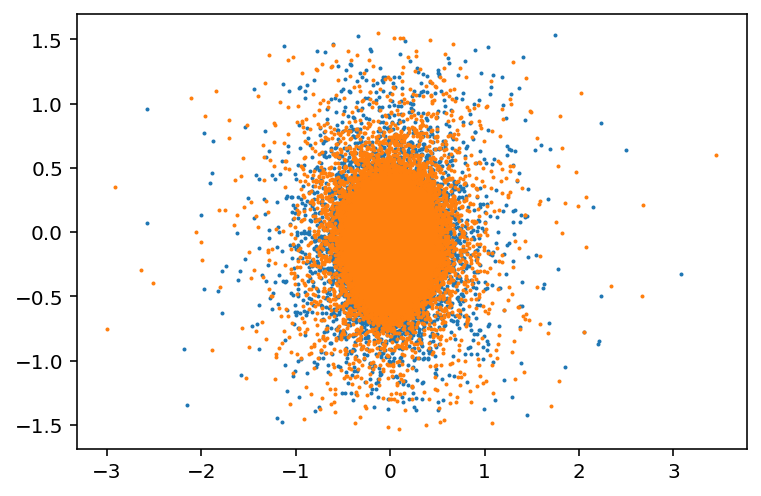

In [6]:
plt.scatter(data0[data0['j_t']==1]['j1_etarot'], data0[data0['j_t']==1]['j1_phirot'], s=1)
plt.scatter(data0[data0['j_g']==1]['j1_etarot'], data0[data0['j_g']==1]['j1_phirot'], s=1)
plt.show()

In [7]:
def make_picture(selected_data):
    n = 36
    im_arr = np.zeros((2*n,2*n))
    max_eta = max(selected_data['j1_etarot'])
    max_phi = max(selected_data['j1_phirot'])
    for i in range(len(selected_data)):
        arr_tmp = np.zeros((2*n,2*n))
        x = n+np.around(selected_data[i]['j1_etarot']*n/1)
        y = n+np.around(selected_data[i]['j1_phirot']*n/1)
        if x<(2*n) and y<(2*n) and x>=0 and y>=0:
            arr_tmp[np.int_(x)][np.int_(y)] = selected_data[i]['j1_pt']
            im_arr = im_arr + arr_tmp
    return im_arr

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


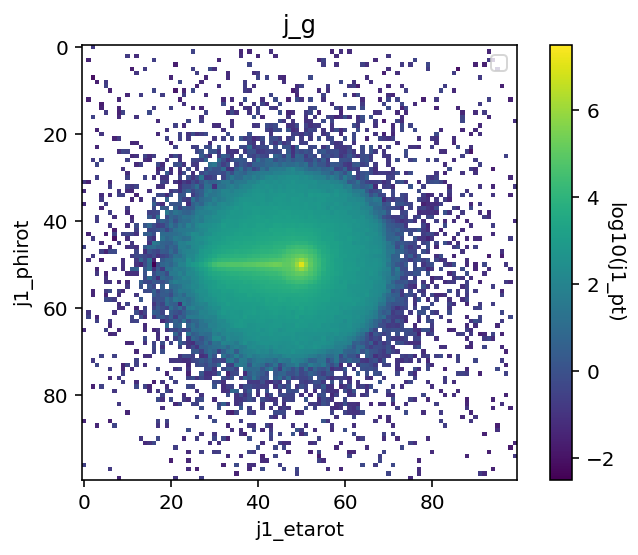

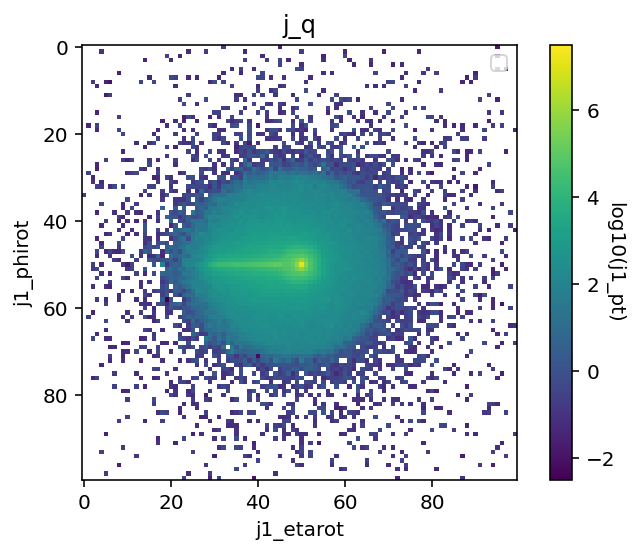

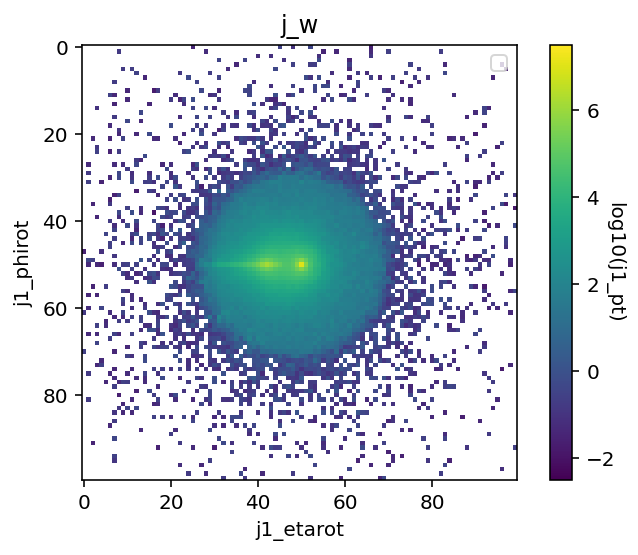

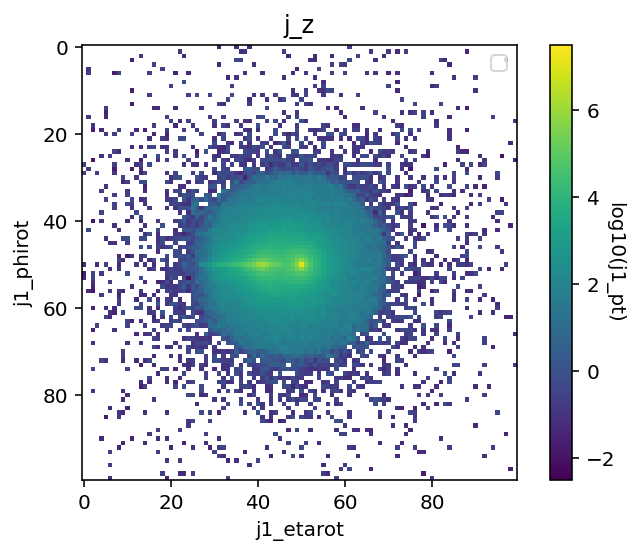

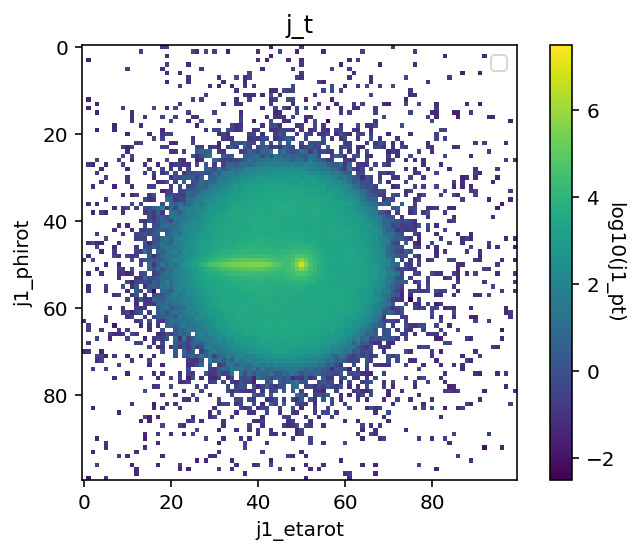

In [8]:
n = 50
for l in range(5):
    im_arr = np.zeros((2*n,2*n))
    j_selected1 = data0[data0[label[l]]==1]    ### j_t
    j_selected2 = j_selected1[j_selected1['j1_etarot']>-1]
    j_selected3 = j_selected2[j_selected2['j1_etarot']<1]
    j_selected4 = j_selected3[j_selected3['j1_phirot']>-1]
    j_selected5 = j_selected4[j_selected4['j1_phirot']<1]
    max_eta = max(j_selected5['j1_etarot'])
    max_phi = max(j_selected5['j1_phirot'])
    for i in range(len(j_selected5)):
        arr_tmp = np.zeros((2*n,2*n))
        x = n+np.around(j_selected5[i]['j1_etarot']*n/(max_eta))
        y = n+np.around(j_selected5[i]['j1_phirot']*n/(max_phi))
        if x<100 and y<100 and x>=0 and y>=0:
            arr_tmp[np.int_(x)][np.int_(y)] = j_selected5[i]['j1_pt']
            im_arr = im_arr + arr_tmp
    plt.imshow(np.log10(im_arr), vmin=-2.5, vmax=7.5)
    #plt.imshow(np.log(im_arr), vmin=-10, vmax=10)
    cbar = plt.colorbar()
    cbar.set_label('log10(j1_pt)', rotation=270)
    plt.xlabel("j1_etarot")
    plt.ylabel("j1_phirot")
    plt.title(label[l])
    plt.legend(loc='best')
    plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


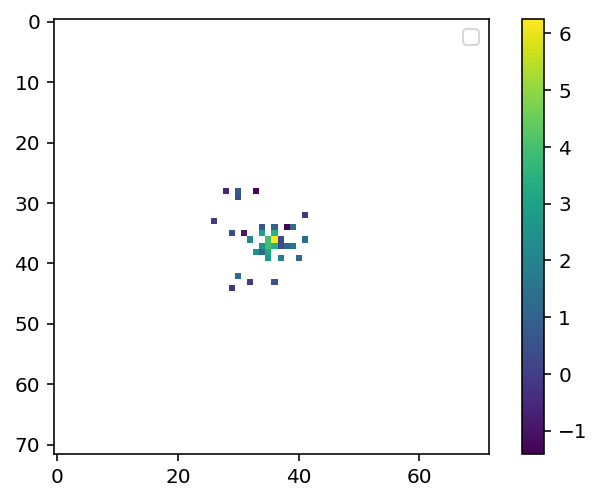

In [9]:
selected_data = data0[data0['j_index']==101333]
im = make_picture(selected_data)
plt.imshow(np.log(im))
plt.colorbar()
plt.legend(loc='best')
plt.show()

In [10]:
### select data

DNN_data_df = pd.DataFrame(np.array(data0))
DNN_data = np.array(DNN_data_df[int_features])
print("The whole data shape is:", DNN_data.shape)

### build target data

DNN_target = np.array(DNN_data_df[label])
print("The target data shape is:", DNN_target.shape)

### split data

y = np.arange(len(DNN_data))
DNN_train, DNN_test, y_train, y_test = train_test_split(DNN_data, y, test_size=0.2)
DNN_target_train = DNN_target[y_train,]
DNN_target_test = DNN_target[y_test,]
print("The training data shape is:", DNN_train.shape)
print("The testing data shape is:", DNN_test.shape)
print("The target training data shape is:", DNN_target_train.shape)
print("The target training data shape is:", DNN_target_test.shape)

The whole data shape is: (5131613, 16)
The target data shape is: (5131613, 5)
The training data shape is: (4105290, 16)
The testing data shape is: (1026323, 16)
The target training data shape is: (4105290, 5)
The target training data shape is: (1026323, 5)


### 5/26 Process

Today, we analysis the data, and pick out 16 interestedd features for bulding DNN model. After that, we build DNN model to catagorize 5 kinds of jet (jg jq jw jz jt) by following https://arxiv.org/pdf/1804.06913.pdf. At the end of today, we split the data into training data and testing data, but we still not start to train the model.

### 6/2 Process

 
We have trained DNN model with 16 interesting high level features using data0. The training process we put in another notebook since the process is quite long. Today, we analysis other data without data0, and biuld confusion matrix. And then, we try to construct another DNN model that classify top quark only with 10 selected high level features. If can, we hope finish training the new DNN mdoel tonight.
* This is out DNN model

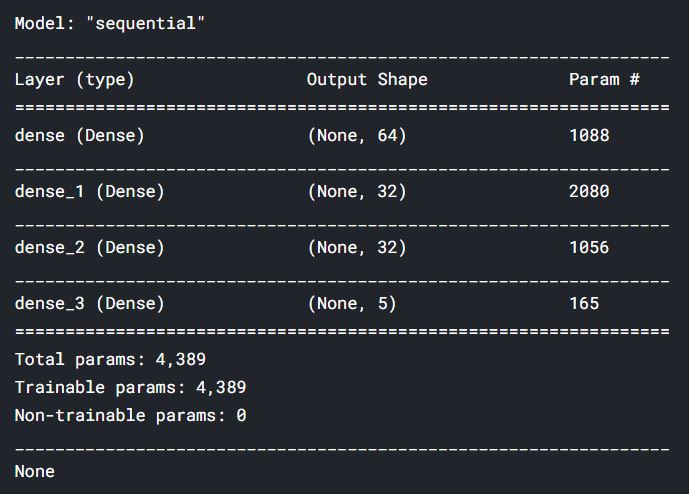

* This is our learning curve

You csn see that the training curve and validation curve is highly overlapped. It shows that we model didnot overtrain.

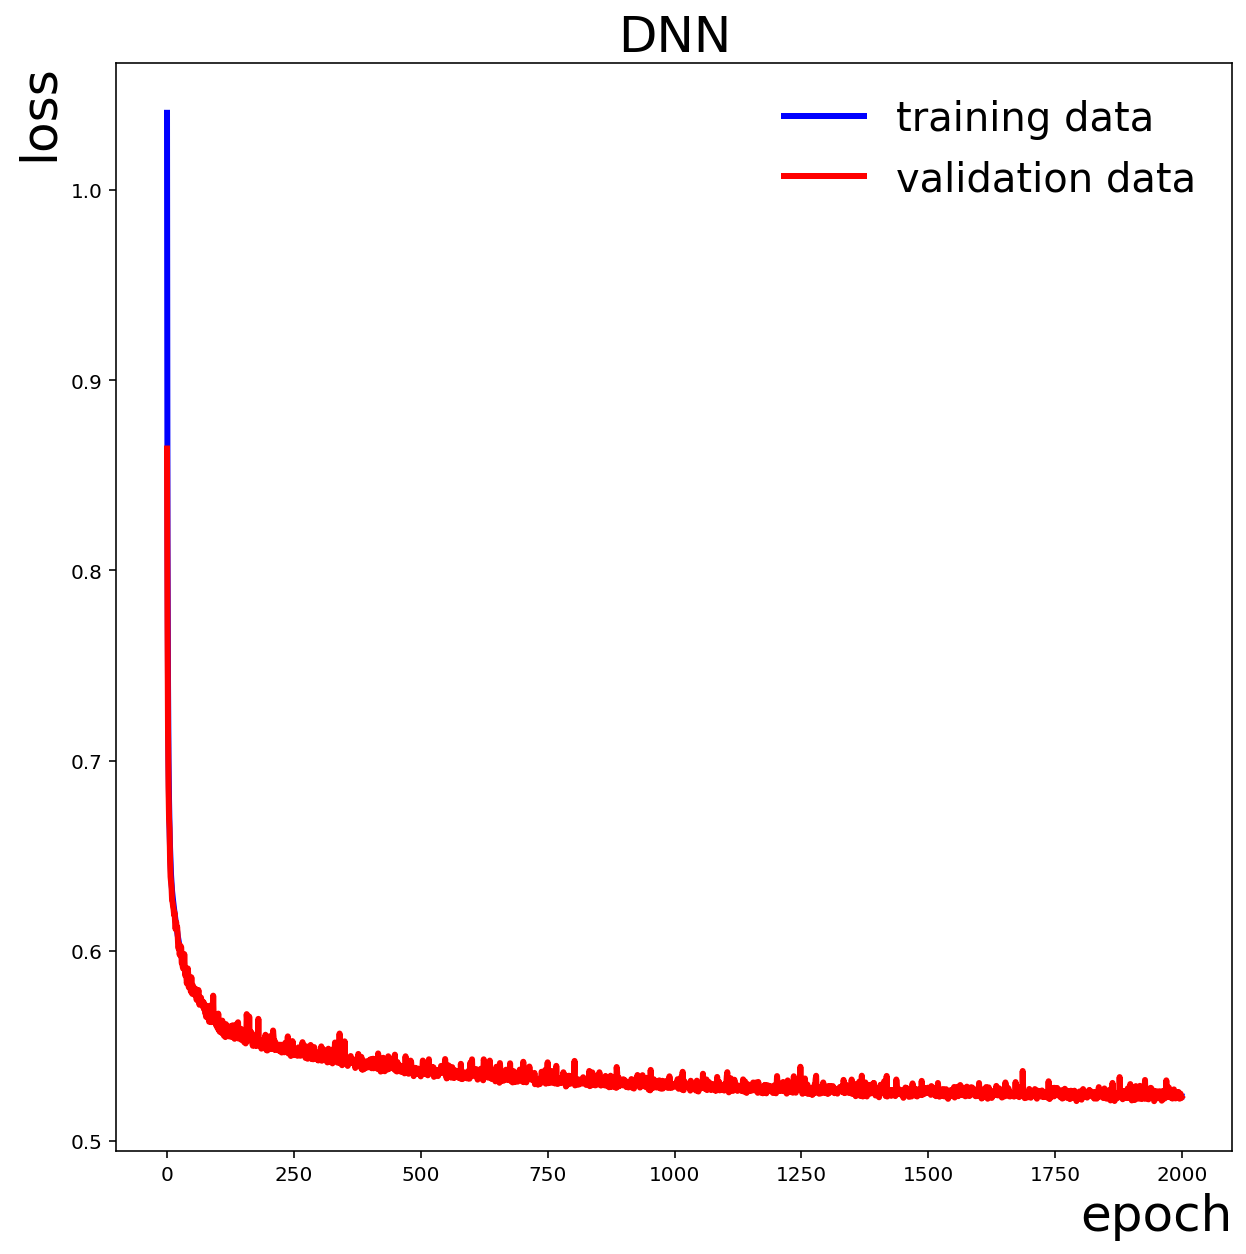

In [11]:
### load model

DNN_model = load_model("../input/model-dnn/model_DNN.h5")

### select data

DNN_data9_df = pd.DataFrame(np.array(data9))
DNN_data9 = np.array(DNN_data9_df[int_features])

### build target data

DNN_target9 = np.array(DNN_data9_df[label])

### predict data

prediction_data9 = DNN_model.predict(DNN_data9)

### AUC score

train_DNN_auc9 = metrics.roc_auc_score(DNN_target9, prediction_data9, average=None)
for i in range(5):
    print("The AUC of ", label[i], " in train data with DNN model is: ", train_DNN_auc9[i])

The AUC of  j_g  in train data with DNN model is:  0.9440624597864014
The AUC of  j_q  in train data with DNN model is:  0.9029237659922756
The AUC of  j_w  in train data with DNN model is:  0.9768074308890381
The AUC of  j_z  in train data with DNN model is:  0.9732121838280474
The AUC of  j_t  in train data with DNN model is:  0.9627080070548543


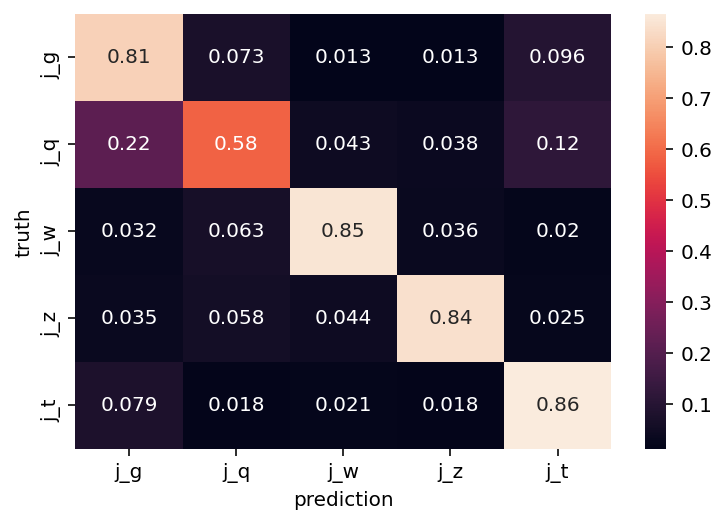

In [12]:
### make confusion matrix of data9

import seaborn as sns
DNN_true = []
DNN_pred = []
for i in range(len(DNN_target9)):
    DNN_true.append(np.where(DNN_target9[i]==np.max(DNN_target9[i]))[0][0])
    DNN_pred.append(np.where(prediction_data9[i]==np.max(prediction_data9[i]))[0][0])
DNNcm = confusion_matrix(DNN_true,DNN_pred)
row_norm_cm = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        row_norm_cm[i][j] = DNNcm[i][j]/sum(DNNcm[i])
sns.heatmap(row_norm_cm,annot=True, xticklabels=label, yticklabels=label)
plt.xlabel('prediction')
plt.ylabel('truth')
plt.show()

### 6/9 Process
In this week, we have done another 2 different model. One is the DNN model for only specipying the top jet. Follwing is the result.

* The mdoel of distingishign top jet from background

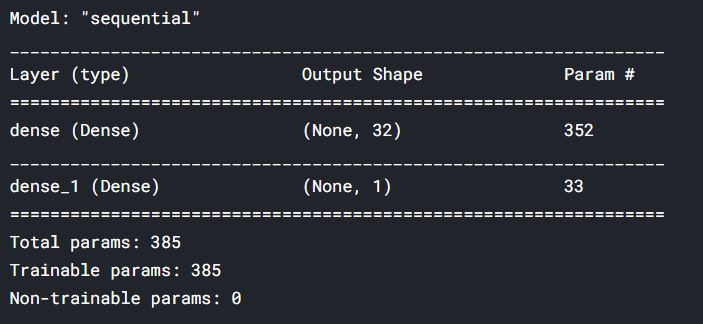

* Learniing curve

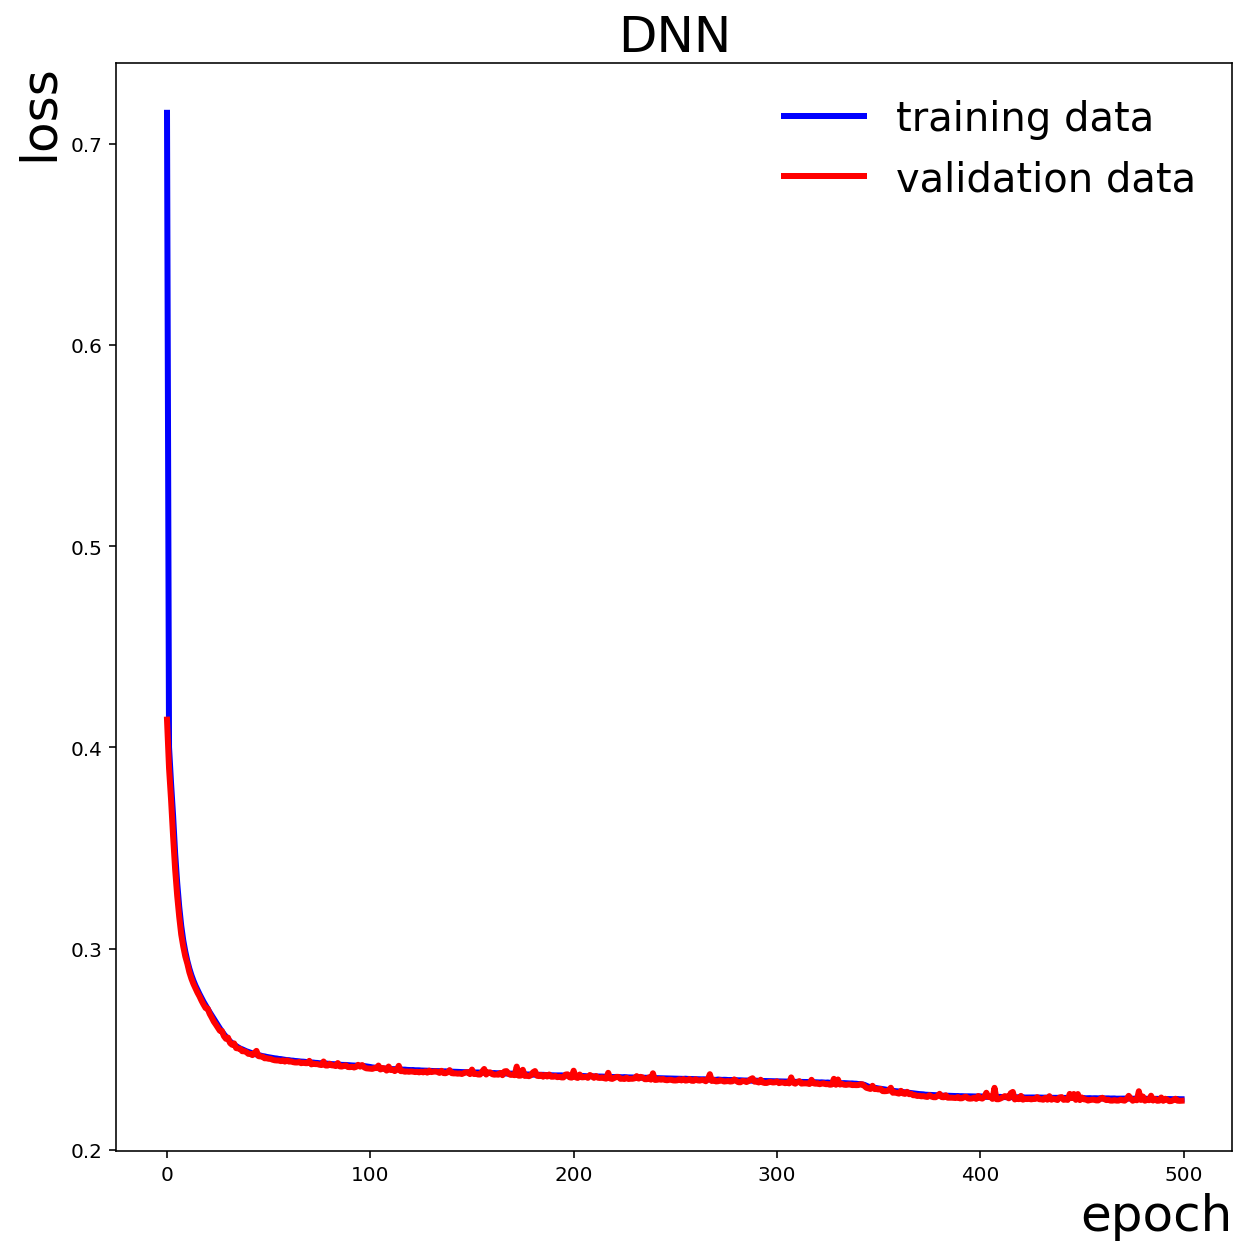

* AUC

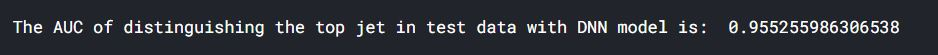

* normalized confusion matrix

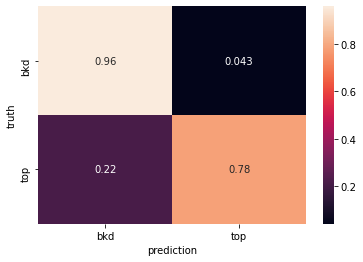

The second mdoel is a CNN model for distingusing top jet from background. Following is the model performance.

* The CNN model

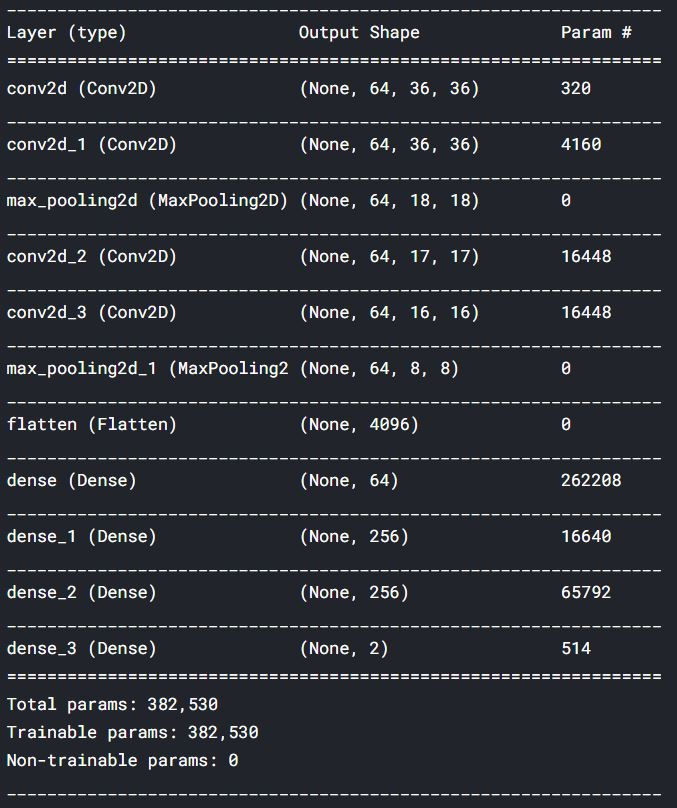

* The learning curve of CNN model

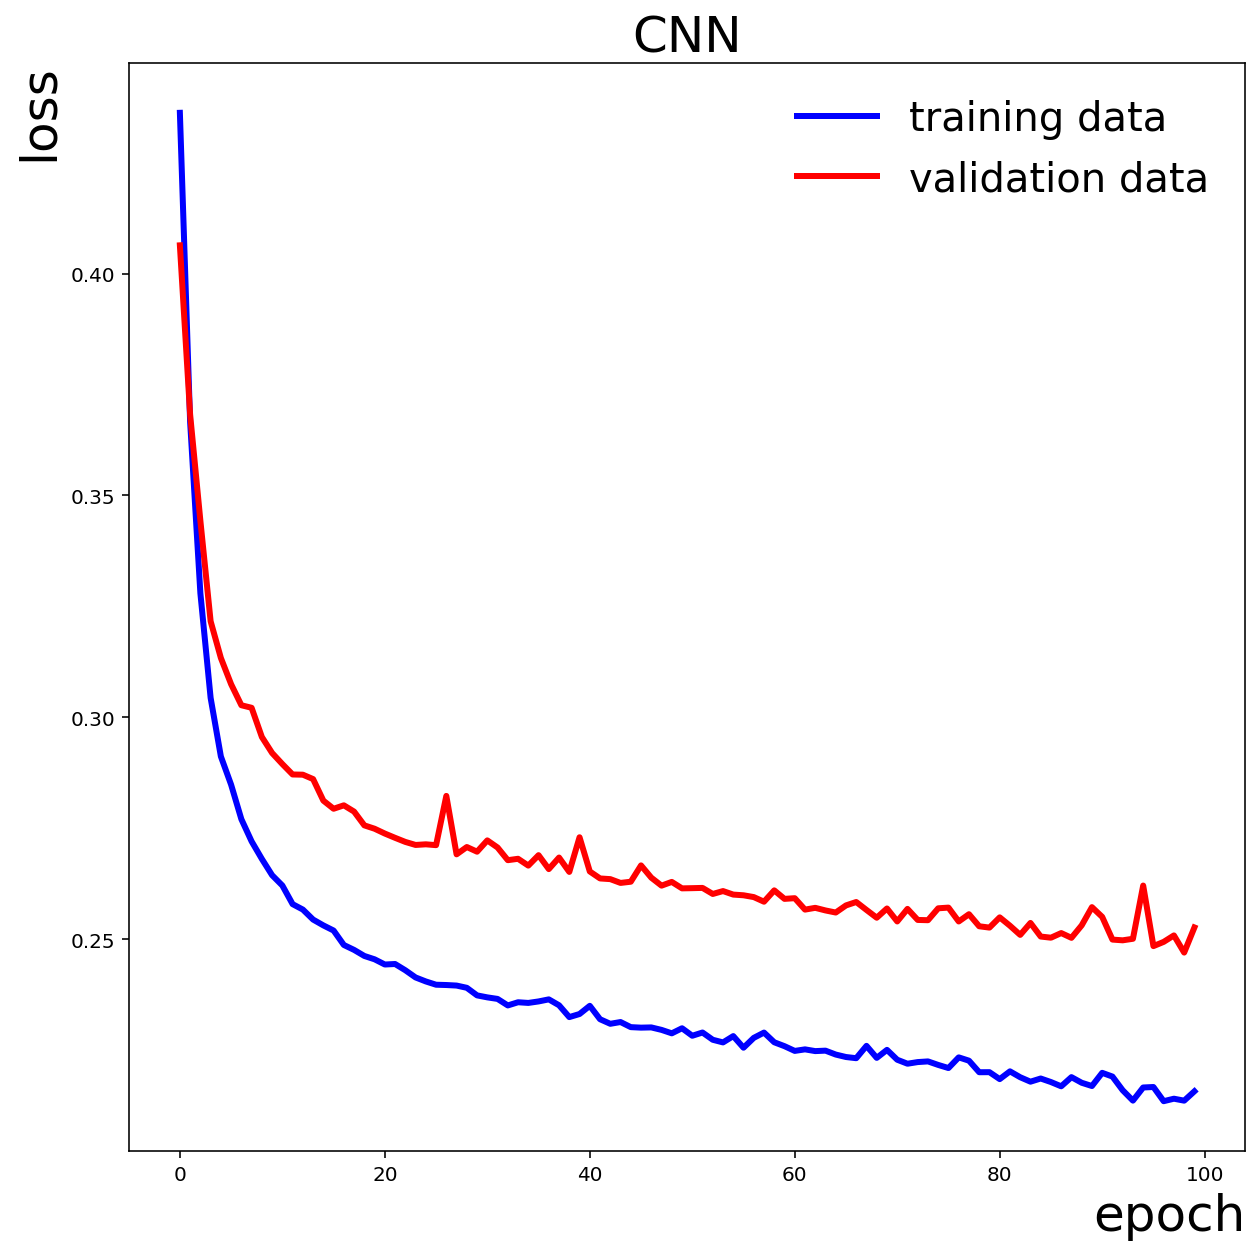

* The AUC of CNN model

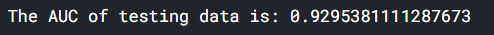

* The confusion matrix of CNN model

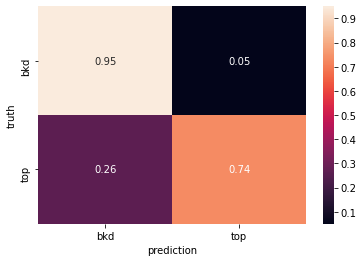

In this week, we will focus on digging into the physics behind the data. Especially, the energy correlation function from this paper: https://arxiv.org/pdf/1609.07483.pdf .
Also, we will work on the final report.